### Fashion MNIST data set classification using Neural Nets

## Image categories
<img src="imgs/fashion.png"
     style="float: left; margin-right: 1px;" width="500" height="400" />

#### Note: The code has been mostly adapted from the workshop code for day 3

In [36]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import fashion_mnist

In [37]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading data

In [38]:
# Load the training and testing data
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
# Display purpose:
X_train_orig = X_train
X_test_orig = X_test

In [39]:
# Store the labels for some other model types:
Y_train_orig = Y_train
Y_test_orig = Y_test

## Data preparation

In [40]:
from keras import backend as K
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)
    

## Pre process and normalize data

In [41]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

## Looking at some images

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

[9 0 0 3 0 2 7 2 5 5]


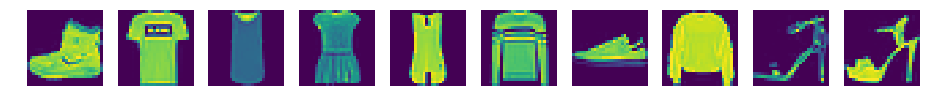

In [43]:
print(Y_train[0:10])

slice = 10
plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_train_orig[i], interpolation='nearest')
    plt.axis('off')

In [44]:
item_label_mapping = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

### Print items with the labels

['Ankle Boot', 'T-shirt/Top', 'T-shirt/Top', 'Dress', 'T-shirt/Top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


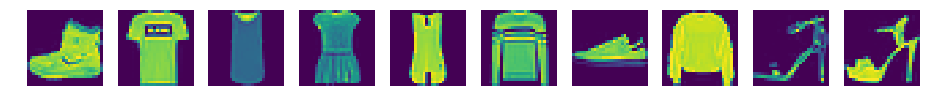

In [45]:
first_10_train_item_labels = [item_label_mapping[index] for index in Y_train[0:10]]
print(first_10_train_item_labels)

slice = 10
plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_train_orig[i], interpolation='nearest')
    plt.axis('off')

['Ankle Boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


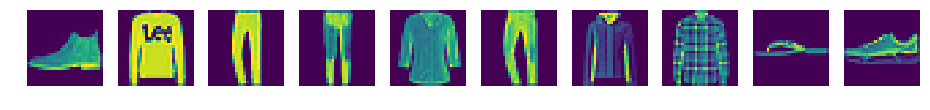

In [46]:
first_10_test_item_labels = [item_label_mapping[index] for index in Y_test[0:10]]
print(first_10_test_item_labels)

slice = 10
plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.axis('off')

### One hot encoding for the label digits 0 ~ 9

In [47]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [48]:
# Converting the classes to its binary categorical form
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [49]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [50]:
Y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [51]:
Y_test[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

### Initialize values for CNN

In [21]:
# -- Initializing the values for the convolution neural network

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# Vanilla SGD
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

### Model 01 - Simple CNN

In [ ]:
nb_epoch = 20

#### Step 1: Model definition

In [18]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                216330    
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


#### Step 2: Compile

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

#### Step 3: Fit

In [20]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 398us/step - loss: 0.4728 - acc: 0.8355 - val_loss: 0.4556 - val_acc: 0.8427
Epoch 2/20
60000/60000 [==============================] - 24s 399us/step - loss: 0.3691 - acc: 0.8669 - val_loss: 0.3884 - val_acc: 0.8652
Epoch 3/20
60000/60000 [==============================] - 24s 407us/step - loss: 0.3462 - acc: 0.8754 - val_loss: 0.3956 - val_acc: 0.8610
Epoch 4/20
60000/60000 [==============================] - 24s 408us/step - loss: 0.3355 - acc: 0.8793 - val_loss: 0.3951 - val_acc: 0.8599
Epoch 5/20
60000/60000 [==============================] - 24s 402us/step - loss: 0.3260 - acc: 0.8826 - val_loss: 0.3896 - val_acc: 0.8604
Epoch 6/20
60000/60000 [==============================] - 23s 389us/step - loss: 0.3034 - acc: 0.8890 - val_loss: 0.4474 - val_acc: 0.8540
Epoch 7/20
60000/60000 [==============================] - 24s 394us/step - loss: 0.2931 - acc: 0.8929 - val_loss: 0.

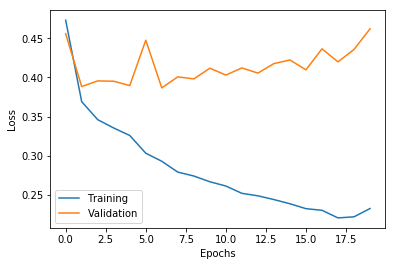

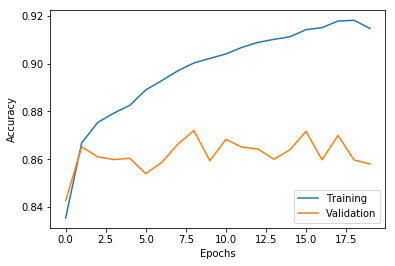

In [21]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

#### Step 4: Evaluate

In [22]:
print('Available Metrics in Model: {}'.format(model.metrics_names))

Available Metrics in Model: ['loss', 'acc']


In [23]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.46189155212640765
Test Accuracy: 0.858


#### Modelling the predictions

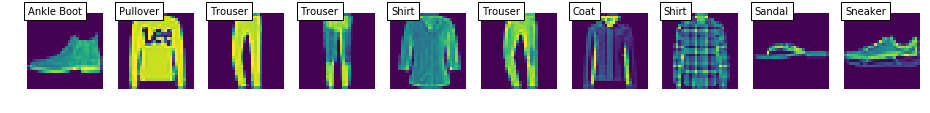

In [28]:
slice = 10
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, item_label_mapping[predicted[i]], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

### Model 02 - CNN with more layers

In [30]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2769024   
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total para

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [ ]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

In [ ]:
slice = 10
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, item_label_mapping[predicted[i]], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

### Model 03 - Deeper model with more convolutional (and ReLu) layers, dropout layers (train with GPU)

In [31]:
nb_epoch = 100

In [32]:
def build_model():
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.summary()
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
    hist = model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    return hist, model

In [33]:
# Train and test model in one shot
hist, model = build_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
__________

Epoch 46/50
60000/60000 [==============================] - 114s 2ms/step - loss: 0.2697 - acc: 0.9023 - val_loss: 0.2606 - val_acc: 0.9042
Epoch 47/50
60000/60000 [==============================] - 114s 2ms/step - loss: 0.2679 - acc: 0.9025 - val_loss: 0.2585 - val_acc: 0.9058
Epoch 48/50
60000/60000 [==============================] - 116s 2ms/step - loss: 0.2644 - acc: 0.9038 - val_loss: 0.2608 - val_acc: 0.9055
Epoch 49/50
60000/60000 [==============================] - 116s 2ms/step - loss: 0.2627 - acc: 0.9043 - val_loss: 0.2561 - val_acc: 0.9070
Epoch 50/50
60000/60000 [==============================] - 115s 2ms/step - loss: 0.2592 - acc: 0.9054 - val_loss: 0.2560 - val_acc: 0.9078
Test score: 0.2560226723790169
Test accuracy: 0.9078


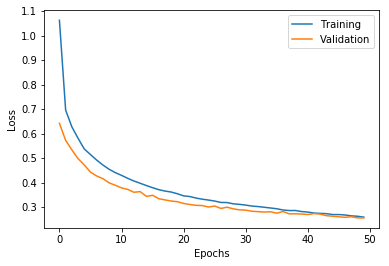

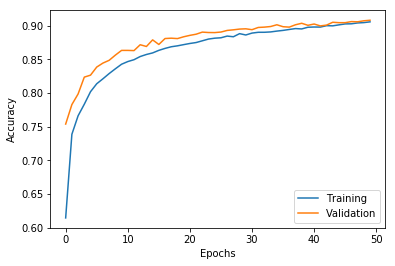

In [34]:
# import matplotlib.pyplot as plt
# %matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [35]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.2560226723790169
Test accuracy: 0.9078


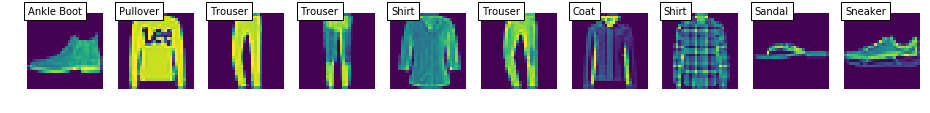

In [23]:
slice = 10
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, item_label_mapping[predicted[i]], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

In [37]:
model.save('cnn.h5')

### Load saved model to do predictions

In [20]:
from keras.models import load_model
cnn_model = load_model('cnn.h5')

### Train a simple MLFF BP NN on the same

In [17]:
nb_epoch = 50
batch_size = 64
def build_mlff_bp_model():
    model = Sequential()
    model.add(Flatten(input_shape=shape_ord))
    model.add(Dense(768, init="uniform", activation="relu"))
    model.add(Dense(384, init="uniform", activation="relu"))
    model.add(Dense(192, init="uniform", activation="relu"))
    model.add(Dense(10))
    model.add(Activation("softmax"))
    model.summary()
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
    hist = model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    return hist, model

G:\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(768, activation="relu", kernel_initializer="uniform")`
  
G:\anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(384, activation="relu", kernel_initializer="uniform")`
  import sys
G:\anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(192, activation="relu", kernel_initializer="uniform")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 768)               602880    
_________________________________________________________________
dense_6 (Dense)              (None, 384)               295296    
_________________________________________________________________
dense_7 (Dense)              (None, 192)               73920     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1930      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 974,026
Trainable params: 974,026
Non-trainable params: 0
_________________________________________________________________
Trai

Test score: 0.33934805368185045
Test accuracy: 0.884


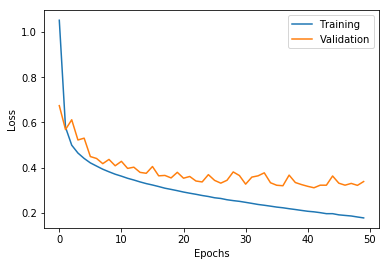

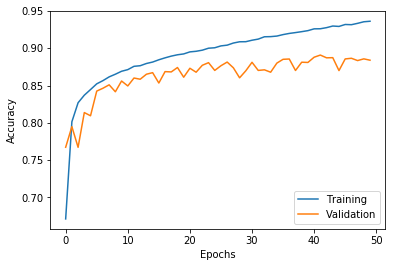

In [18]:
hist, mlff_bp_model = build_mlff_bp_model()
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

score, accuracy = mlff_bp_model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

mlff_bp_model.save('mlff_bp_model.h5')

### Load models and create a simple ensemble

In [52]:
from keras.models import load_model
cnn_model = load_model('cnn.h5')
mlff_bp_model = load_model('mlff_bp_model.h5')

In [53]:
slice = 100

models = {"CNN": cnn_model, "MLFF BP": mlff_bp_model}
accuracies = [0.9, 0.88]
test_data = X_test[:slice]

prediction_results = []

for model_name, model in models.items():
    prediction_results.append((model_name, model.predict(test_data).argmax(-1)))
    
prediction_results



[('CNN',
  array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
         7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 7,
         6, 7, 2, 1, 2, 6, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
         2, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
         0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2], dtype=int64)),
 ('MLFF BP',
  array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
         7, 5, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7,
         6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
         3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
         0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=int64))]

In [54]:
incorrect_classifications = []
for itr in range(slice):
    actual_label = Y_test[itr]
    for prediction_result in prediction_results:
        model_name = prediction_result[0]
        prediction_result[1][itr]
        if prediction_result[1][itr] != actual_label.argmax(-1):
            incorrect_classifications.append((itr, model_name, prediction_result[1][itr]))
            

print("Number of incorrect classifications out of {0}: {1}".format(slice, str(len(incorrect_classifications))))

Number of incorrect classifications out of 100: 18


In [55]:
incorrect_classifications

[(12, 'MLFF BP', 5),
 (17, 'MLFF BP', 2),
 (23, 'CNN', 5),
 (23, 'MLFF BP', 5),
 (25, 'CNN', 2),
 (40, 'MLFF BP', 0),
 (42, 'CNN', 6),
 (42, 'MLFF BP', 6),
 (49, 'CNN', 6),
 (49, 'MLFF BP', 6),
 (51, 'MLFF BP', 2),
 (66, 'MLFF BP', 3),
 (67, 'CNN', 4),
 (68, 'CNN', 7),
 (68, 'MLFF BP', 7),
 (89, 'CNN', 2),
 (89, 'MLFF BP', 2),
 (98, 'CNN', 2)]

Mis-classified images by CNN,MLFF BP


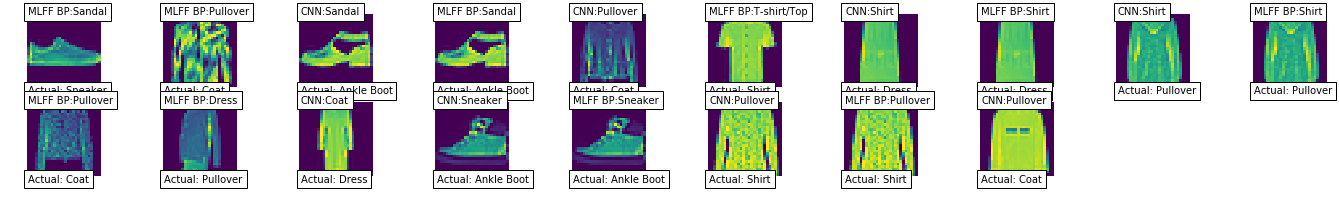

In [57]:
import math
num_images_per_row = 10

plt.figure(figsize=(24,16))
title_text = "Mis-classified images by {0}".format(",".join(models))
plt.title(title_text)
print(title_text)

for idx, incorrect_classification in enumerate(incorrect_classifications):
    test_image_index = incorrect_classification[0]
    predicted_image = incorrect_classification[2]
    model_name = incorrect_classification[1]
    plt.subplot(math.ceil(slice / num_images_per_row), num_images_per_row, idx+1)
    plt.imshow(X_test_orig[test_image_index], interpolation='nearest')
    actual_label = item_label_mapping[Y_test_orig[test_image_index]]
    plt.text(0, 0, model_name + ":" + item_label_mapping[predicted_image], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.text(0, 30, "Actual: " + actual_label, color = 'black', bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

### Train a probabilistic neural network

In [30]:
#print(X_train.shape)
#print(Y_train.shape)

X_train_reshaped = np.reshape(X_train, (60000,-1))
print(X_train_reshaped.shape)

print(Y_train_orig.shape)

(60000, 784)
(60000,)


In [32]:
from neupy import algorithms
from sklearn import metrics
pnn = algorithms.PNN(verbose=False)

pnn.train(X_train_reshaped, Y_train_orig)

X_test_reshaped = np.reshape(X_test, (10000,-1))
print(X_test_reshaped.shape)

y_predicted = pnn.predict(X_test_reshaped)



Time: 0:00:00 |N/A%|                                           | ETA:  --:--:--

(10000, 784)


Time: 0:09:54 | 11%|#####                                       | ETA:  1:17:06

KeyboardInterrupt: 

In [58]:
metrics.accuracy_score(Y_test_orig, y_predicted)

NameError: name 'y_predicted' is not defined